### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("qsar_androgen_receptor.csv", delimiter = ";", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,positive
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,negative
1683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1684,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
1685,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


##CLASS IMBALANCE DETECTION

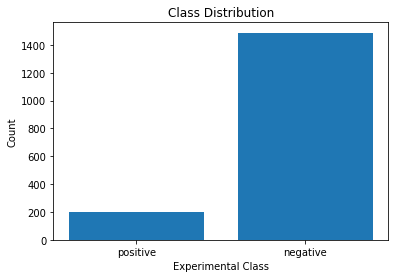

In [3]:
positives = sum(df[1024]=='positive')
negatives = sum(df[1024]=='negative')

# plot bar plot
plt.bar(['positive', 'negative'], [positives, negatives])
plt.xlabel('Experimental Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


##LABEL ENCODING FOR TARGET CLASS

In [4]:
# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the column of categorical data
df[1024] = le.fit_transform(df[1024])


df[1024]

0       1
1       1
2       1
3       1
4       1
       ..
1682    0
1683    0
1684    0
1685    0
1686    0
Name: 1024, Length: 1687, dtype: int64

##SCATTER PLOT

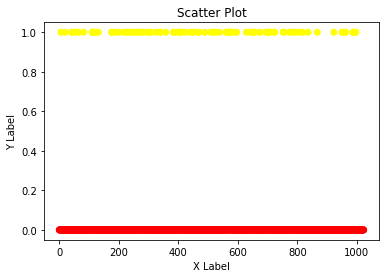

In [5]:
x1= [i for i in range(1024)] # x-coordinates
y1 = [df[i][1024] for i in range(1024)] # y-coordinates

colors = []
for j in y1:
  if j == 0:
    colors.append('red')
  else:
    colors.append('yellow')

plt.scatter(x1, y1,c=colors)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Scatter Plot')
plt.show()


### Defining X as Features and Y as Target

In [6]:
from sklearn.model_selection import train_test_split

# feature and target variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.dtypes)



0       int64
1       int64
2       int64
3       int64
4       int64
        ...  
1019    int64
1020    int64
1021    int64
1022    int64
1023    int64
Length: 1024, dtype: object


###LOGISTIC PCA USING FACTOR ANALYSIS

In [7]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


SMOTE AND ADASYN for imbalanced dataset

In [8]:
# apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

# apply ADASYN to the training data only
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

##KNN algorithm for SMOTE

Accuracy: 64.20%
              precision    recall  f1-score   support

           0       0.98      0.61      0.75       300
           1       0.23      0.92      0.37        38

    accuracy                           0.64       338
   macro avg       0.61      0.76      0.56       338
weighted avg       0.90      0.64      0.71       338

Cross-entropy Loss: 12.903201361192824


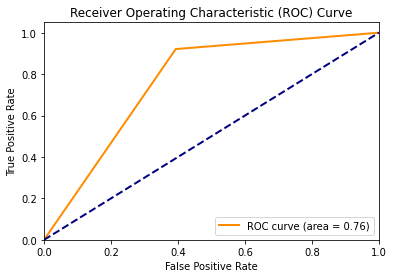

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, y_train1)

knn_pred = knn.predict(X_test)

#calculate the accuracy score for SMOTE
acc = accuracy_score(y_test, knn_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

print(classification_report(y_test, knn_pred))
loss = log_loss(y_test, knn_pred)
print("Cross-entropy Loss:", loss)

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




##KNN algorithm for ADASYN

Accuracy: 62.43%
              precision    recall  f1-score   support

           0       0.99      0.58      0.73       300
           1       0.22      0.95      0.36        38

    accuracy                           0.62       338
   macro avg       0.61      0.77      0.55       338
weighted avg       0.90      0.62      0.69       338

Cross-entropy Loss: 13.543029527863546


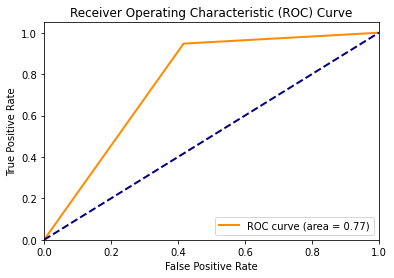

In [10]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_resampled, y_train_resampled)
knn_pred1 = knn1.predict(X_test)
#calculate the accuracy score for ADASYN
acc = accuracy_score(y_test, knn_pred1)
print("Accuracy: {:.2f}%".format(acc * 100))

print(classification_report(y_test, knn_pred1))
loss = log_loss(y_test, knn_pred1)
print("Cross-entropy Loss:", loss)


# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, knn_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





##XGB Classifier for SMOTE

Accuracy: 88.76%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       300
           1       0.50      0.50      0.50        38

    accuracy                           0.89       338
   macro avg       0.72      0.72      0.72       338
weighted avg       0.89      0.89      0.89       338



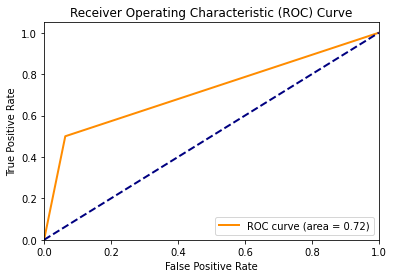

Cross-entropy Loss: 4.052245055581218


In [11]:
xgb_model = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train1, y_train1)
xgb_pred = xgb_model.predict(X_test)



#calculate the accuracy score for SMOTE
acc = accuracy_score(y_test, xgb_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

print(classification_report(y_test, xgb_pred))

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

loss = log_loss(y_test, xgb_pred)
print("Cross-entropy Loss:", loss)


##XGB Classifier for ADASYN 

Accuracy: 89.64%
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       300
           1       0.54      0.50      0.52        38

    accuracy                           0.90       338
   macro avg       0.74      0.72      0.73       338
weighted avg       0.89      0.90      0.89       338

Cross-entropy Loss: 3.7323309722458595


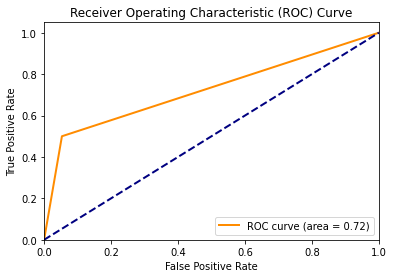

In [12]:
xgb_model1 = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1)

xgb_model1.fit(X_train_resampled, y_train_resampled)
xgb_pred1 = xgb_model1.predict(X_test)
#calculate the accuracy score for ADASYN
acc = accuracy_score(y_test, xgb_pred1)
print("Accuracy: {:.2f}%".format(acc * 100))

print(classification_report(y_test, xgb_pred1))

loss = log_loss(y_test, xgb_pred1)
print("Cross-entropy Loss:", loss)


# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


##Random Forest Classifier for SMOTE



Accuracy: 80.77%
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       300
           1       0.29      0.50      0.37        38

    accuracy                           0.81       338
   macro avg       0.61      0.67      0.63       338
weighted avg       0.86      0.81      0.83       338

Cross-entropy Loss: 6.931471805599452


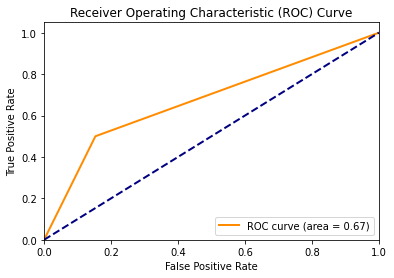

In [13]:
# create a RandomForestClassifier object with desired hyperparameters
rf_model = RandomForestClassifier(n_estimators=500, max_depth=5)
# fit the model to the training data
rf_model.fit(X_train1, y_train1)

rf_pred = rf_model.predict(X_test)

acc2 = accuracy_score(y_test, rf_pred)
print("Accuracy: {:.2f}%".format(acc2 * 100))

print(classification_report(y_test, rf_pred))

loss = log_loss(y_test, rf_pred)
print("Cross-entropy Loss:", loss)

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 77.81%
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       300
           1       0.25      0.47      0.32        38

    accuracy                           0.78       338
   macro avg       0.59      0.65      0.60       338
weighted avg       0.85      0.78      0.81       338

Cross-entropy Loss: 7.997852083383982


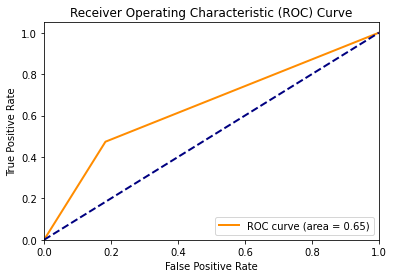

Cross-entropy Loss: 7.997852083383982


In [14]:
rf_model1 = RandomForestClassifier(n_estimators=300, max_depth=5)
rf_model1.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
rf_pred1 = rf_model1.predict(X_test)

#calculate the accuracy score
acc2 = accuracy_score(y_test, rf_pred1)
print("Accuracy: {:.2f}%".format(acc2 * 100))

print(classification_report(y_test, rf_pred1))

loss = log_loss(y_test, rf_pred1)
print("Cross-entropy Loss:", loss)

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, rf_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Cross-entropy Loss:", loss)

